In [22]:
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import degree, remove_self_loops, add_self_loops
from torch_geometric.nn import SAGEConv

class SAGENet(nn.Module):
    def __init__(self):
        super(SAGENet, self).__init__()
        self.conv1 = SAGEConv(dataset.num_features, 16)
        self.conv2 = SAGEConv(16, dataset.num_classes)
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

## Cora

In [2]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='./dataset/Cora', name='Cora')

In [3]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SAGENet().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

filename = 'LossAndAccuracy/GraphSAGE_Cora.txt'

model.train()
for epoch in range(2000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    # if epoch > 200:
    model.eval()
    _, pred = model(data).max(dim=1)
    correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
    acc = correct / data.test_mask.sum().item()

    with open(filename,'a') as f: # 'a'表示append,即在原来文件内容后继续写数据（不清楚原有数据）
        f.write('{:02d} {:.4f} {:.4f}\n'.format(epoch, loss, acc))
        
    # print(epoch, 'Accuracy: {:.4f}'.format(acc))
    # print('Epoch: {:02d}, Loss: {:.4f}, Acc: {:.4f}'.format(epoch, loss, acc))

test

In [4]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.8080


#### 绘制曲线

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data_cora =np.loadtxt("LossAndAccuracy/GraphSAGE_Cora.txt")

x = data_cora[:,0] # epoch
y1 = data_cora[:,1] # loss
y2 = data_cora[:,2] # accuracy

Text(0.5, 1.0, 'loss for training GraphSAGE on cora')

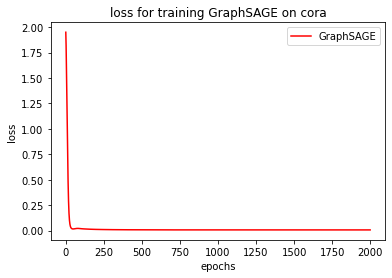

In [11]:
# 画出整体的loss曲线

# pl.plot(x,y1,'g-',label=u'Dense_Unet(block layer=5)')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
p2 = pl.plot(x, y1,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GraphSAGE on cora')


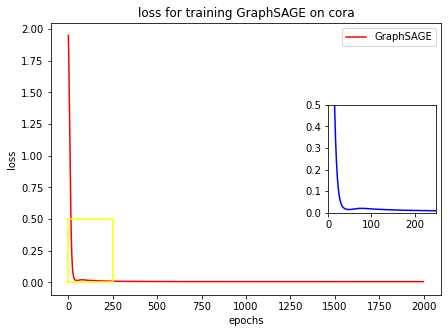

In [20]:
# 先创建一幅图，再在这幅图上添加一个小图，小图用来显示部分放大的曲线
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线

# pl.plot(x,y1,'g-',label=u'Dense_Unet(block layer=5)')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
p2 = pl.plot(x, y1,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GraphSAGE on cora')

# 显示放大的部分曲线
# plot the box
tx0 = 0
tx1 = 250
#设置想放大区域的横坐标范围
ty0 = 0.000
ty1 = 0.50
#设置想放大区域的纵坐标范围
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')
#loc是设置小图的放置位置，可以有"lower left,lower right,upper right,upper left,upper #,center,center left,right,center right,lower center,center"
axins.plot(x,y1, color='blue', ls='-')
axins.axis([0, 250, 0.000, 0.50])
plt.savefig("graphs/GraphSAGE_cora_loss.png")
pl.show()


Text(0.5, 1.0, 'accuracy for training GraphSAGE on cora')

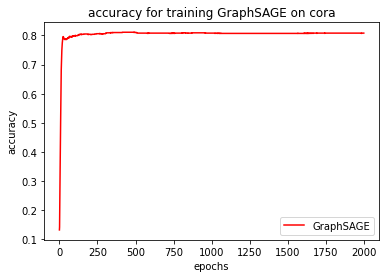

In [16]:
# 画出整体的accuracy曲线

# pl.plot(x,y1,'g-',label=u'Dense_Unet(block layer=5)')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
p2 = pl.plot(x, y2,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GraphSAGE on cora')


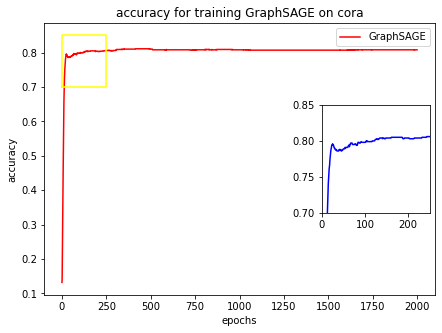

In [21]:
# 先创建一幅图，再在这幅图上添加一个小图，小图用来显示部分放大的曲线
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线

# pl.plot(x,y1,'g-',label=u'Dense_Unet(block layer=5)')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
p2 = pl.plot(x, y2,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GraphSAGE on cora')

# 显示放大的部分曲线
# plot the box
tx0 = 0
tx1 = 250
#设置想放大区域的横坐标范围
ty0 = 0.70
ty1 = 0.85
#设置想放大区域的纵坐标范围
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')
#loc是设置小图的放置位置，可以有"lower left,lower right,upper right,upper left,upper #,center,center left,right,center right,lower center,center"
axins.plot(x,y2, color='blue', ls='-')
axins.axis([0, 250, 0.70, 0.85])
plt.savefig("graphs/GraphSAGE_cora_accuracy.png")
pl.show()

In [5]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([1433, 16])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([16, 7])
conv2.bias 	 torch.Size([7])
Optimizer's state_dict:
state 	 {2122909734456: {'step': 500, 'exp_avg': tensor([[-1.5372e-09, -3.6302e-08,  1.2443e-07,  ...,  4.3779e-08,
          4.5793e-09, -1.6427e-08],
        [ 3.0117e-07, -5.2442e-07, -1.6640e-07,  ..., -1.2002e-07,
          3.2634e-07,  1.1106e-08],
        [ 1.6621e-07, -2.3828e-07,  3.6103e-07,  ...,  1.2651e-07,
          2.4987e-07,  3.0036e-07],
        ...,
        [ 1.3241e-07, -1.4171e-08, -2.3807e-07,  ..., -3.5387e-07,
          1.8345e-07,  2.4907e-07],
        [ 2.4264e-07, -1.7286e-07,  5.0230e-08,  ..., -6.7059e-07,
          5.9470e-07, -2.6128e-08],
        [ 2.3443e-07,  4.0907e-07, -6.5464e-08,  ...,  2.7290e-08,
          8.4999e-07, -1.1880e-07]], device='cuda:0'), 'exp_avg_sq': tensor([[6.1555e-10, 6.5336e-10, 8.9134e-10,  ..., 4.4704e-10, 6.4362e-10,
         3.1271e-10],
        [3.773

In [6]:
torch.save(model.state_dict(), "SAGEcora.pkl")

## Citeseer

In [23]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='./dataset/Citeseer', name='CiteSeer')

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SAGENet().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

filename = 'LossAndAccuracy/GraphSAGE_Citeseer.txt'

model.train()
for epoch in range(2000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    _, pred = model(data).max(dim=1)
    correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
    acc = correct / data.test_mask.sum().item()

    with open(filename,'a') as f: # 'a'表示append,即在原来文件内容后继续写数据（不清楚原有数据）
        f.write('{:02d} {:.4f} {:.4f}\n'.format(epoch, loss, acc))

In [25]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.6810


#### 绘制曲线

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data_cora =np.loadtxt("LossAndAccuracy/GraphSAGE_Citeseer.txt")

x = data_cora[:,0] # epoch
y1 = data_cora[:,1] # loss
y2 = data_cora[:,2] # accuracy

Text(0.5, 1.0, 'loss for training GraphSAGE on citeseer')

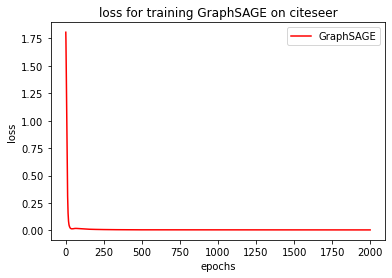

In [27]:
# 画出整体的loss曲线

# pl.plot(x,y1,'g-',label=u'Dense_Unet(block layer=5)')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
p2 = pl.plot(x, y1,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GraphSAGE on citeseer')

Text(0.5, 1.0, 'accuracy for training GraphSAGE on citeseer')

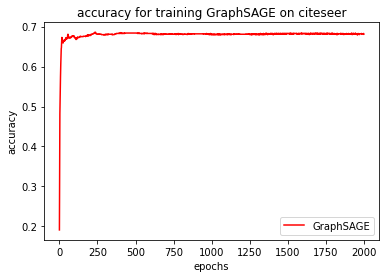

In [28]:
# 画出整体的accuracy曲线

# pl.plot(x,y1,'g-',label=u'Dense_Unet(block layer=5)')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
p2 = pl.plot(x, y2,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GraphSAGE on citeseer')

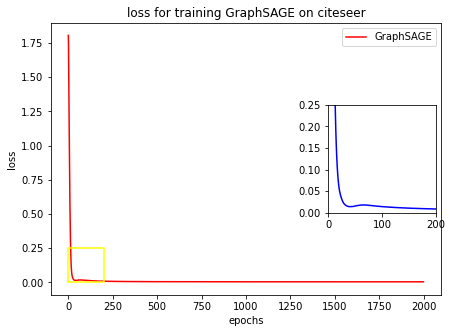

In [31]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线
p2 = pl.plot(x, y1,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GraphSAGE on citeseer')

# 显示放大的部分曲线
tx0 = 0
tx1 = 200
ty0 = 0.000
ty1 = 0.25
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y1, color='blue', ls='-')
axins.axis([0, 200, 0.000, 0.25])
plt.savefig("graphs/GraphSAGE_citeseer_loss.png")
pl.show()

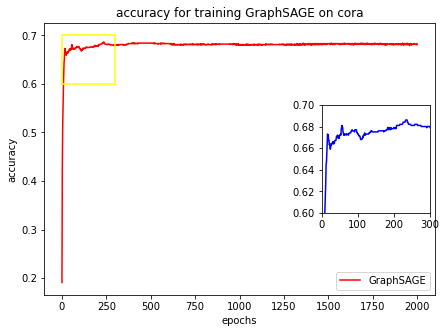

In [32]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线

p2 = pl.plot(x, y2,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GraphSAGE on cora')

# 显示放大的部分曲线
tx0 = 0
tx1 = 300
#设置想放大区域的横坐标范围
ty0 = 0.60
ty1 = 0.70
#设置想放大区域的纵坐标范围
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y2, color='blue', ls='-')
axins.axis([0, 300, 0.60, 0.70])
plt.savefig("graphs/GraphSAGE_citeseer_accuracy.png")
pl.show()

model details

In [33]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([3703, 16])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([16, 6])
conv2.bias 	 torch.Size([6])
Optimizer's state_dict:
state 	 {2222769759560: {'step': 2000, 'exp_avg': tensor([[-1.9856e-08,  4.6625e-07,  5.4931e-08,  ...,  2.0332e-07,
         -8.5107e-08, -1.1738e-06],
        [-2.6546e-08, -2.3004e-07, -1.5846e-06,  ...,  2.0695e-07,
          1.6286e-07, -3.1161e-09],
        [-8.6063e-09, -2.5319e-09, -8.0805e-10,  ...,  3.6029e-08,
          2.1432e-08,  9.9380e-09],
        ...,
        [-3.1042e-09, -3.2955e-08,  9.0953e-09,  ...,  2.4528e-08,
         -4.0159e-08, -9.8770e-08],
        [-4.9325e-18,  1.7351e-14, -5.3403e-20,  ...,  5.6052e-45,
          7.0065e-45, -1.4013e-45],
        [-8.7018e-09,  3.7942e-08,  5.1708e-09,  ..., -9.8804e-08,
          2.3611e-08,  4.0148e-08]], device='cuda:0'), 'exp_avg_sq': tensor([[4.3188e-11, 1.6113e-10, 1.7350e-10,  ..., 4.3637e-10, 5.5388e-10,
         3.1582e-10],
        [8.41

In [34]:
torch.save(model.state_dict(),'SAGEciteseer.pkl')

## Pubmed

In [35]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='./dataset/Pubmed', name='Pubmed')

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SAGENet().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

filename = 'LossAndAccuracy/GraphSAGE_Pubmed.txt'

model.train()
for epoch in range(2000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    _, pred = model(data).max(dim=1)
    correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
    acc = correct / data.test_mask.sum().item()

    with open(filename,'a') as f: # 'a'表示append,即在原来文件内容后继续写数据（不清楚原有数据）
        f.write('{:02d} {:.4f} {:.4f}\n'.format(epoch, loss, acc))

In [37]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.7700


#### 绘制曲线

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data_cora =np.loadtxt("LossAndAccuracy/GraphSAGE_Pubmed.txt")

x = data_cora[:,0] # epoch
y1 = data_cora[:,1] # loss
y2 = data_cora[:,2] # accuracy

Text(0.5, 1.0, 'loss for training GraphSAGE on pubmed')

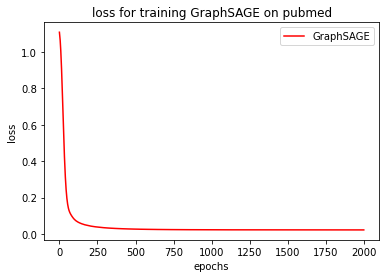

In [39]:
# 画出整体的loss曲线

p2 = pl.plot(x, y1,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GraphSAGE on pubmed')

Text(0.5, 1.0, 'accuracy for training GraphSAGE on pubmed')

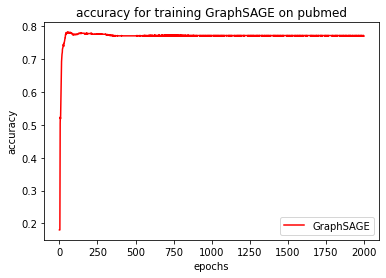

In [40]:
# 画出整体的accuracy曲线

p2 = pl.plot(x, y2,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GraphSAGE on pubmed')

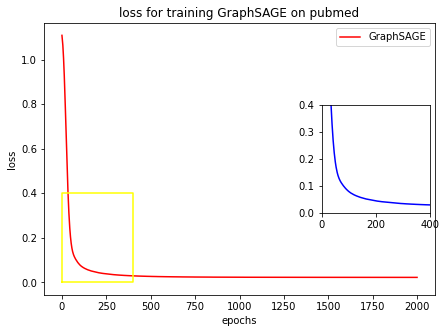

In [41]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线
p2 = pl.plot(x, y1,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GraphSAGE on pubmed')

# 显示放大的部分曲线
tx0 = 0
tx1 = 400
ty0 = 0.000
ty1 = 0.40
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y1, color='blue', ls='-')
axins.axis([0, 400, 0.000, 0.40])
plt.savefig("graphs/GraphSAGE_pubmed_loss.png")
pl.show()

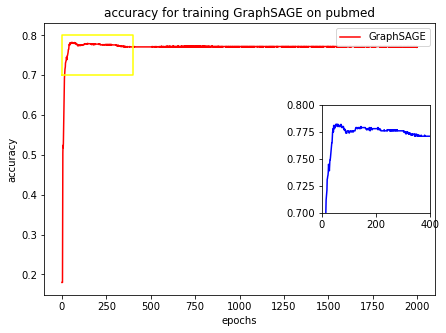

In [42]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线

p2 = pl.plot(x, y2,'r-', label = u'GraphSAGE')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GraphSAGE on pubmed')

# 显示放大的部分曲线
tx0 = 0
tx1 = 400
#设置想放大区域的横坐标范围
ty0 = 0.70
ty1 = 0.80
#设置想放大区域的纵坐标范围
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y2, color='blue', ls='-')
axins.axis([0, 400, 0.70, 0.80])
plt.savefig("graphs/GraphSAGE_pubmed_accuracy.png")
pl.show()

In [43]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([500, 16])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([16, 3])
conv2.bias 	 torch.Size([3])
Optimizer's state_dict:
state 	 {2222769751528: {'step': 2000, 'exp_avg': tensor([[-6.1337e-07, -3.5308e-06, -4.2003e-07,  ...,  3.0387e-08,
          1.8025e-06,  9.5935e-07],
        [-2.8366e-07, -3.5724e-07, -2.3481e-07,  ..., -8.1387e-08,
          1.4893e-07,  2.9547e-07],
        [-1.1391e-06, -8.3032e-07, -9.2155e-07,  ..., -1.8882e-07,
          5.1366e-07,  1.2007e-06],
        ...,
        [-4.6841e-07, -1.0391e-06, -3.6514e-07,  ..., -2.4490e-07,
          4.2450e-07,  5.7216e-07],
        [-2.9661e-07, -8.0847e-07, -2.2653e-07,  ..., -1.4250e-07,
          6.4017e-08,  9.0580e-08],
        [-4.0477e-07, -1.8819e-07, -3.4716e-07,  ...,  1.8090e-08,
          1.5308e-07,  4.0655e-07]], device='cuda:0'), 'exp_avg_sq': tensor([[1.5428e-08, 9.6937e-09, 4.2570e-09,  ..., 1.5038e-07, 4.7467e-08,
         2.5116e-08],
        [3.602

In [44]:
torch.save(model.state_dict(),'SAGEpubmed.pkl')